# <b style="color:#f87730"> ⏩ Importando bibliotecas e o DataFrame. </b>

Como boa prática no nosso código, devemos começar importando o conjunto de ferramentas (bibliotecas)

que serão utilizadas ao longo do código. Enquanto trabalhamos no projeto, podemos sentir a necessidade

de "chamar" outras bibliotecas. Se for o caso, devemos voltar aqui e adicioná-las abaixo, afim de 

manter o código limpo e organizado, e para uma fácil identificação das ferramentas utilizadas. 

In [1]:
import csv
import numpy as np
import pandas as pd
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

Após isso, devemos ler o(s) conjunto(s) de dados que será utilizado, a partir da função **READ** do pandas.

###### O read conta com algumas variantes, a depender do tipo de arquivo lido. No nosso caso, utilizaremos o read_csv pois nossos arquivos estão no formato CSV.

In [2]:
# Ao rodar o código sem parâmetros (como o encoding), iremos nos deparar com um erro de decodificação de um caráctere.
# Procurando sobre ele no google, podemos encontrar sua causa (caso não fosse conhecida) e sua solução.
# Nesse caso, apenas trocar o encoding nos dará o resultado desejado, e conseguiremos ler o arquivo:

data = pd.read_csv('Data/forest_fires.csv', encoding='latin-1')

# 🌎 Visão geral e Tratamento dos dados

Nosso DataFrame (DF) tem poucas colunas, e por isso conseguimos visualizar todas na própria chamada do DF:

In [3]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


Caso não fosse o caso (se o DF tiver dezenas de colunas), poderíamos ver todas a partir da propriedade **COLUMNS**:

In [4]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [5]:
data.shape

(6454, 5)

_________

Outra propriedade, a **DTYPES**, nos permite ver os nomes das colunas e os tipos de dados que elas armazenam.

É de extrema importância saber qual o tipo em que estão armazenados os nossos dados, para pensarmos

na melhor solução possível para os problemas que envolverão essas entradas.

In [6]:
data.dtypes

year        int64
state      object
month      object
number    float64
date       object
dtype: object

Um exemplo claro disso é a coluna **DATE**, que atualmente está como object. Caso fosse utilizar

essa coluna, ela seria transformada em um **DATETIME**, conforme a fórmula a seguir:

In [7]:
data.date = pd.to_datetime(data.date)

Porém, se olharmos com um pouco mais de cuidado para essa coluna, vamos perceber sua redundância:

Nesse caso, ela trata de uma média mensal, logo seus dias são sempre setados como 01. Além disso,

por alguma razão (formato divulgado pelo governo? erro no scrapping/transformação antes do upload no Kaggle?)

todos os meses nessa coluna também estão setados como 01, conforme observamos abaixo:

In [8]:
print(f'Dias:\n {data.date.dt.day.value_counts()}')

print(f'Meses:\n {data.date.dt.month.value_counts()}')

Dias:
 1    6454
Name: date, dtype: int64
Meses:
 1    6454
Name: date, dtype: int64


Com isso, opto por remover esta coluna do nosso DF, já que suas informações já existem nas colunas "year" e "month"

> ❗ ATENÇÃO: Para a alteração ser atribuída e não apenas visualizada, devemos atribuir a operação (drop) a uma variável,
>
>   neste caso, o próprio DF. Pode ser feito como na atribuição abaixo, ou usando o parâmetro **INPLACE**, que apesar de funcionar,
>
>   é atualmente uma prática desencorajada pela própria documentação do Pandas.

In [9]:
data = data.drop("date", axis=1)

De forma similar, percebemos que a coluna "number" está no formato **FLOAT**, porém devemos lembrar que

o formato de FLOAT serve para números decimais. Porém, devemos concordar que não existe "um fogo e meio".

Ou o incêndio existe ou não. Logo, vamos passar para **INT** essa coluna, que são os números inteiros.

In [10]:
data.number = data.number.astype('int64')

Ao chamar novamente o DTYPES, podemos observar que os seu tipos foram alterados:

In [11]:
data.dtypes

year       int64
state     object
month     object
number     int64
dtype: object

____

Agora, verificaremos se existem **dados duplicados**.

Na linha de código abaixo, selecionamos dentro do conjunto de dados aqueles dados que são duplicados,

e com o parâmetro Keep setado p/ False, podemos ter uma visão de todas entradas repetidas.

In [12]:
data[data.duplicated(keep=False)]

,year,state,month,number
258,2017,Alagoas,Janeiro,38
259,2017,Alagoas,Janeiro,38
2391,1998,Mato Grosso,Janeiro,0
2411,1998,Mato Grosso,Fevereiro,0
2431,1998,Mato Grosso,Março,0
...,...,...,...,...
4841,1998,Rio,Abril,0
4861,1998,Rio,Maio,0
4864,2001,Rio,Maio,4
4910,2007,Rio,Julho,7


Atenção: O Keep = False servirá apenas para a visualização dos dados,

pois se o mantermos durante a remoção dos dados, acabaremos com um total

de 0 dessas entradas (ele não MANTERÁ nenhuma). Segue abaixo:

In [13]:
data = data.drop_duplicates()

In [14]:
# Verificando novamente, vemos que não existem mais valores duplicados:

data[data.duplicated(keep=False)]

,year,state,month,number


________

Outro ponto importante que devemos SEMPRE estar atentos são valores nulos e faltantes. Podemos determinar a sua quantidade da seguinte maneira:

Usamos o método .isnull(), que determinará uma variável booleana ao registro (False se o registro estiver preenchido, True caso esteja faltando)

Após isso, usamos outro método, o .sum() para realizar a contagem geral do total de registros faltantes. Caso exista algum registro faltante devemos observar

um número diferente de 0, e tomar as devidas providências para que nossas análises não sejam contaminadas ou atrapalhadas por ele.

In [15]:
# No conjunto de dados trabalhado, observamos que todos os valores existem e não há registros nulos, logo não será necessário nenhuma alteração aqui:

data.isnull().sum()

year      0
state     0
month     0
number    0
dtype: int64

____________

## 🔠 Corrigindo erros ortográficos

Aqui, identifico quais os estados estão com nomes reduzidos ou incorretos para facilitar a identificação dos mesmos pelo PBI.

Em seguida, crio um **Dicionário** contendo como chave os nomes incorretos e como valor os nomes certos.

In [16]:
data.state.unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [17]:
corrigidos = {'Amapa':'Amapá', 'Ceara':'Ceará', 'Espirito Santo':'Espírito Santo',
'Goias':'Goiás', 'Maranhao':'Maranhão', 'Paraiba':'Paraíba', 'Piau':'Piauí',
'Rio':'Rio de Janeiro', 'Rondonia':'Rondônia', 'Sao Paulo':'São Paulo'}

Após realizar esse trabalho manual, utilizo o método **REPLACE** do Pandas para substituir as chaves pelos valores corretos.

In [18]:
data = data.replace(corrigidos.keys(), corrigidos.values())

In [19]:
# Com isso, chamamos novamente o UNIQUE para ver se os dados foram substituídos corretamente.

data.state.unique()

array(['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará',
       'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraíba', 'Pernambuco',
       'Piauí', 'Rio de Janeiro', 'Rondônia', 'Roraima', 'Santa Catarina',
       'São Paulo', 'Sergipe', 'Tocantins'], dtype=object)

É importante atentar-se à falta de alguns estados no conjunto de dados. São eles:

> _Rio Grande do Norte; Rio Grande do Sul; Paraná e Mato Grosso do Sul._

Como os dados não estão inclusos no Dataset e a fonte primária dos dados (http://dados.gov.br/dataset/sistema-nacional-de-informacoes-florestais-snif)

não está disponível no momento de acesso (02/02/2023, 20:05), não há como determinar exatamente o motivo dos dados faltantes.

Uma possibilidade a ser levantada seriam os estados "Rio" se referirem erroneamente à três estados,

o Rio de Janeiro (Escolhido p/ ser o "RIO" nesses dados), o R.G. do Norte e o R.G. do Sul.

______

# 📣 <b style="color:red">ATENÇÃO - ANOMALIAS NOS DADOS</b>

Todos os plots e informações obtidas através dos dados nesse notebook <b style="color:red">NÃO</b> são representações fiéis da realidade.

Os dados utilizados estão <b style="color:red">CRITICAMENTE</b> comprometidos, de forma que não é possível determinar com exatidão as informações

contidas em vários estados. Como informado na célula acima, e demonstrado na célula abaixo, **VÁRIOS** estados estão com informações

que não pertencem aos mesmos. Por exemplo, o estado "RIO" conta com basicamente 3x o número de registros que ele devia conter,

muito provavelmente devido à mistura dos estados citada acima, realizada pela própria pessoa que upou os dados. É possível observar também o 

Mato Grosso, que engloba o MT e o MT. do Sul, contando com 2x o número de registros esperados, e também o estado da Paraíba, que conta

também com 2x o número de registros esperados.

In [65]:
data.groupby('state').count()

,year,month,number
state,,,
Acre,239,239,239
Alagoas,239,239,239
Amapá,239,239,239
Amazonas,239,239,239
Bahia,239,239,239
Ceará,239,239,239
Distrito Federal,239,239,239
Espírito Santo,239,239,239
Goiás,239,239,239


> Tentei de diversas formas obter os dados da sua fonte PRIMÁRIA, mas aparentemente este segmento do portal de dados do governo foi descontinuado.

Mesmo utilizando sites como o WAYBACK MACHINE (https://web.archive.org/web/20181126222108/https://dados.gov.br/dataset/sistema-nacional-de-informacoes-florestais-snif),

que disponibiliza um "mirror" do site, não é possível baixar os arquivos em si, pois seu endereço de origem não está mais disponível.

🧨 **IMPLICAÇÕES**: Devido a isso, veremos um número desproporcional de ocorrências nesses estados (MATO GROSSO, RIO DE JANEIRO E PARAÍBA), o que

contaminará a análise, de forma que não podemos confiar totalmente nos dados. As ocorrências serão distribuídas de formas irreais que não

refletem a realidade. Algumas medidas poderiam ser tomadas para tentar "contornar" o problema, como atribuir a estes estados uma **MÉDIA**

de acordo com o cenário nacional, ou dividindo o número destes estados que contam com mais registros para o número "ideal" em cada estado,

mas isso não resolveria nosso problema, já que **CADA ESTADO POSSUI UMA PARTICULARIDADE CLIMÁTICA E SOCIAL**, de forma que ainda assim

estaríamos atribuindo números totalmente fora da realidade de cada estado.

# 🔍 Visualizando os dados limpos

Seguindo com a visualização dos dados, podemos usar o método **DESCRIBE** para observar algumas das características das colunas numéricas do DF

In [20]:
data.describe()

,year,number
count,6421.000000,6421.000000
mean,2007.490734,108.773867
std,5.732222,191.184606
min,1998.000000,0.000000
25%,2003.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,114.000000
max,2017.000000,998.000000


A partir do describe, podemos ter uma visão das características gerais do DF:

1. Count - **Contagem de registros** (linhas) na coluna;

2. Mean - **Média da coluna**;

3. Std - **Desvio padrão da coluna** (podemos observar por exemplo que no **YEAR** o STD é baixo,

    pois os dados se concentram num período de apenas 19 anos de diferença, enquanto no NUMBER
    
    temos um STD muito mais alto, pois os dados variam entre 0 e 998 na coluna;

4. Min - **Valor mínimo** encontrado na coluna, menor registro;

5. 25% - **Primeiro Quartil** ou **Q1** (25% dos valores se encontram abaixo daqui);

6. 50% - **Segundo Quartil** ou **Q2** (50% dos valores estão abaixo daqui);

7. 75% - **Terceiro Quartil** ou **Q3** (75% dos valores estão abaixo daqui);

8. Max - **Valor máximo** encontrado na coluna, maior registro.

In [21]:
# Além dos quartis padrão vistos acima, podemos obter os dados que se encontram antes de uma porcentagem X%,
# utilizando o método QUANTILE, e dentro dele passando a porcentagem que desejamos como argumento: nesse caso, 60%

data.quantile(0.60)

year      2009.0
number      46.0
Name: 0.6, dtype: float64

Também podemos gerar gráficos que nos ajudam na visualização da distribuição dos dados, como o **BOXPLOT**.

Nesse caso, podemos ver os três quartis citados acima na **BARRA** do gráfico, sendo sua parte inferior o Q1,

a linha verde o Q2 e sua parte superior o Q3. Além disso, percebemos também uma linha que segue até um valor

que se aproxima de 275. Esses dados são considerados "normais" dentro da distribuição. Os pontos pretos são os **OUTLIERS**,

dados que não estão dentro da distribuição esperada da maioria dos dados. Porém, isso não quer dizer que devemos sempre

eliminar estes dados, ou que eles são um problema. Nesse caso, eles não afetarão nossas análises estatísticas nem os gráficos,

e por se tratarem de uma representação da realidade, serão mantidos no nosso conjunto de dados.

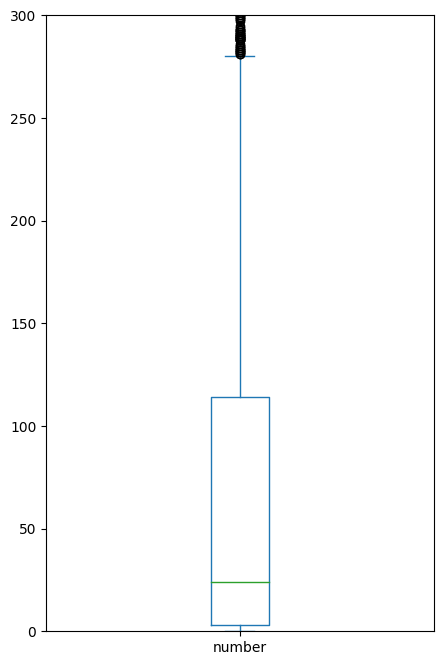

In [22]:
# Nestes dados os outliers (bolinhas pretas) vão até próximas do valor de 1000 se não limitarmos o tamanho do gráfico.
# Porém, para melhor visualização dos quartis em si, optei por limitar o range entre 0 e 300, onde começam a aparecer
# Os primeiros outliers. Os valores continuam existindo, apenas não estão destacados no gráfico.


data.number.plot(kind='box', figsize=(5,8))

plt.ylim(0,300)
plt.show()

Outro método para verificarmos essa distribuição é o **DISTPLOT**, da biblioteca **SEABORN**:

Notamos que ela não é uma Distribuição Padrão (Gaussiana/Bell Shaped), e sim uma distribuição

<b style="color:#1c87d9">**RIGHT SKEWED**</b>, ou seja, seus dados seguem o padrão de estarem altamente concentrados na parte DIREITA.

Isso se confirma quando observamos os valores da Moda, que vem primeiro (0), seguido da mediana (24) e em seguida, a Média (108)

Moda: 0;
Mediana: 24.0;
Média: 108.77386699890982


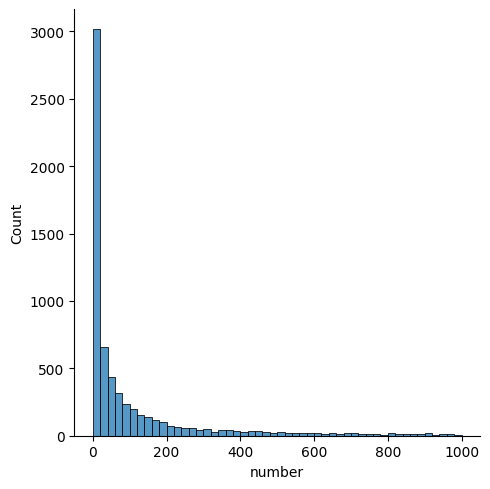

In [23]:
sns.displot(data, x='number', binwidth=20)

plt.plot()
print(f'Moda: {data.number.mode()[0]};\nMediana: {data.number.median()};\nMédia: {data.number.mean()}')


____________

# 📊 Plots

Após realizar a limpeza e visualização da distribuição dos nossos dados, partimos para o plot

de gráficos que nos forneçam mais informações sobre as ocorrências dos incêndios.

In [24]:
def colorindo_dados(entrada):
  # Aqui é feito a classificação de cores para exibir no

  color = 'crimson' if entrada > 40000 else 'GoldenRod' if entrada > 15000 else 'LemonChiffon'

  return f'background: {color}'

In [43]:
total_mais_recorrentes = data[['state', 'number']].groupby(by='state').sum().sort_values(by='number', ascending=False)
total_mais_recorrentes.style.applymap(colorindo_dados)


,number
state,
Mato Grosso,96178
Paraíba,52423
São Paulo,51118
Rio de Janeiro,45093
Bahia,44718
Piauí,37777
Goiás,37677
Minas Gerais,37453
Tocantins,33675


🛑 Caso não tenha lido a divisão de ATENÇÃO no notebook, favor retornar e ler.

No gráfico abaixo, podemos observar que o número TOTAL de incêndios é muito maior no agrupamento de estados do

Mato Grosso (MS e MT), primeiro colocado, do que no segundo colocado (PB e PR). Isso pode ser explicado por alguns fatores:

> Os estados do Mato Grosso estão entre as regiões mais quentes do Brasil, com uma temperatura média diária de 33 graus;
>
> Os estados são responsáveis por grandes produção agrícolas no país. É uma prática comum a utilização do fogo para "limpar" o terreno p/ plantio ou pós colheita;
>
> Nos meses mais quentes, a umidade relativa do ar no estado pode baixar consideravelmente, já que suas maiores reservas aquáticas (Pantanal) se concentram no sul do MT e norte do MS.

A união destes fatores faz com que esse agrupammento seja o campeão disparado no número total de queimadas, apesar de ter como "concorrentes" outros dois agrupamentos de estado,

representados pela Paraíba e Rio de Janeiro.

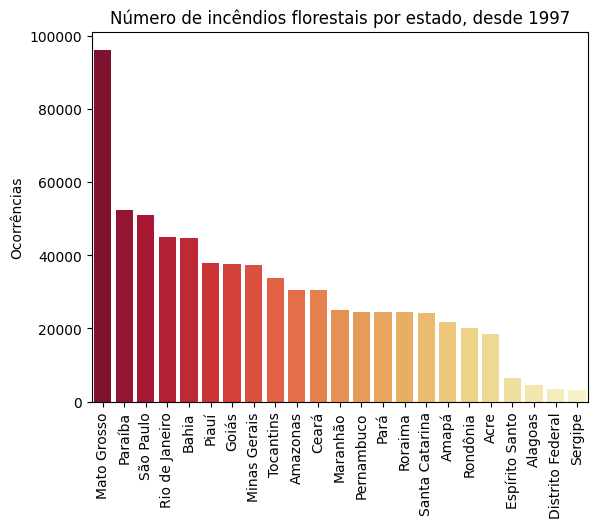

In [66]:
sns.barplot(data=total_mais_recorrentes, x=total_mais_recorrentes.index, y='number', palette='YlOrRd_r')

plt.xticks(rotation=90)
plt.title('Número de incêndios florestais por estado, desde 1997')
plt.xlabel('')
plt.ylabel('Ocorrências')
plt.show()

Uma medida que pode nos aproximar um pouco mais da verdade, apesar de não ser ideal, é a média, já que ela irá dividir

o **VALOR DOS REGISTROS** pelo **NÚMERO DE LINHAS** em cada estado/agrupamento. Com isso, teremos um gráfico onde os

agrupamentos do MATO GROSSO, PARAÍBA E RIO DE JANEIRO ficam um pouco menos distoantes da realidade:

In [88]:
medias_mais_recorrentes = data.groupby('state').number.mean().sort_values(ascending=False).reset_index()

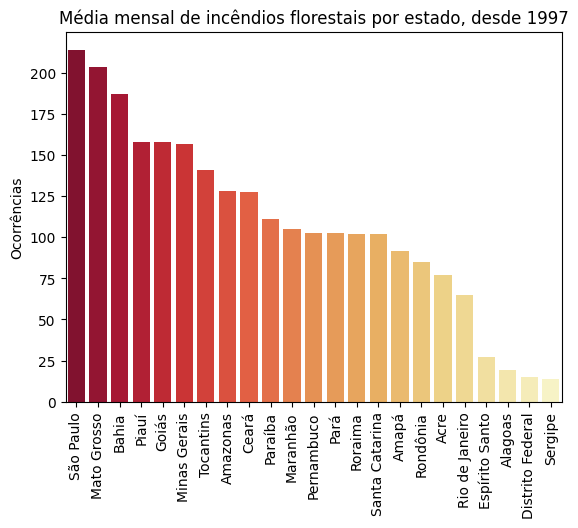

In [92]:
sns.barplot(data=medias_mais_recorrentes, x=medias_mais_recorrentes.state, y=medias_mais_recorrentes.number, palette='YlOrRd_r')

plt.xticks(rotation=90)
plt.title('Média mensal de incêndios florestais por estado, desde 1997')
plt.xlabel('')
plt.ylabel('Ocorrências')
plt.show()

In [27]:
data.groupby('year').sum()

,number
year,
1998,19999
1999,26869
2000,27341
2001,29039
2002,37369
2003,42737
2004,38424
2005,34984
2006,33811


<AxesSubplot:>

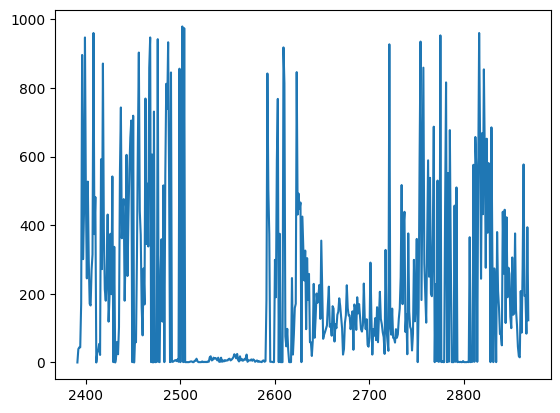

In [137]:
data.groupby('state').get_group('Mato Grosso').number.plot()

# 📤 Exportando dados limpos p/ usar no Power BI

Aqui, a partir do método **to_csv** do Pandas, exportamos nossos dados limpos para um novo arquivo, para ser usado no PBI.

In [26]:
data.to_csv('Data/dados_limpos.csv', index=False)

_____